## Imports and Setup

In [1]:
import os
import pprint
os.chdir("..")

from src.dfcv_colocation_mapping import data_download
from src.dfcv_colocation_mapping import data_utils
from src.dfcv_colocation_mapping import map_utils

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

import warnings
warnings.filterwarnings(action="ignore", message=r"datetime.datetime.utcnow")
warnings.simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

%load_ext autoreload
%autoreload 2

## Parameters

In [13]:
iso_code = "SEN"
adm_level = "ADM3"

## Download Datasets

In [14]:
dm = data_download.DatasetManager(
    iso_code, 
    adm_level=adm_level,
    data_dir="data/",
    config_file="src/dfcv_colocation_mapping/configs/data_config.yaml",
    acled_file="creds/acled_creds.yaml",
    dtm_file="creds/dtm_creds.yaml",
    idmc_file="creds/idmc_creds.yaml",
    adm_config_file="src/dfcv_colocation_mapping/configs/adm_config.yaml",
    osm_config_file="src/dfcv_colocation_mapping/configs/osm_config.yaml",
    mhs_aggregation="power_mean",
    resample_worldcover=True
)

In [11]:
dm.set_acled_filters(
    category="disorder_type", 
    values = [
        'Strategic developments'
    ],
    operation="exclude"
)
dm.set_acled_filters(
    category="sub_event_type", 
    values = [
        'Peaceful protest'
    ],
    operation="exclude"
)

# Sense-check inclusion/exclusion criteria
pprint.pprint(dm.acled_filters)

{'exclude': {'disorder_type': ['Strategic developments'],
             'event_type': ['Strategic developments'],
             'sub_event_type': ['Agreement',
                                'Arrests',
                                'Change to group/activity',
                                'Disrupted weapons use',
                                'Headquarters or base established',
                                'Looting/property destruction',
                                'Non-violent transfer of territory',
                                'Other',
                                'Peaceful protest']},
 'include': {'disorder_type': ['Political violence',
                               'Political violence; Demonstrations',
                               'Demonstrations'],
             'event_type': ['Protests',
                            'Violence against civilians',
                            'Battles',
                            'Riots',
                            'Explosions/

In [19]:
dm.download_all()
geoplot = map_utils.GeoPlot(dm, data_dir="data/", map_config_file="src/dfcv_colocation_mapping/configs/map_config.yaml")
dm.data.sort_values("mhs_all_wbg_acled_worldpop_exposure_relative", ascending=False).head(3)

INFO:root:Loading ADM3 geoboundaries...
INFO:root:Loading asset layers...
INFO:root:Loading hazard layers...
INFO:root:Loading conflict data...
INFO:root:Conflict start date: 2015-10-02
INFO:root:Conflict end date: 2025-10-02
INFO:root:Loading ACLED conflict data...
INFO:root:Loading UCDP conflict data...
INFO:root:Loading displacement data...
INFO:root:Displacement start date: 2015-10-02
INFO:root:Displacement end date: 2025-10-02
INFO:root:Loading IOM DTM data...
INFO:root:Loading IDMC displacement data...
INFO:root:Calculating scores...
INFO:root:Downloading OSM...


,iso_code,ADM3,ADM3_ID,ADM2_ID,ADM2,ADM1_ID,ADM1,worldpop,worldcover_builtup,worldcover_cropland,bem,geometry,earthquake,earthquake_worldpop_exposure,earthquake_worldpop_intensity_weighted_exposure,earthquake_worldcover_builtup_exposure,earthquake_worldcover_builtup_intensity_weighted_exposure,earthquake_worldcover_cropland_exposure,earthquake_worldcover_cropland_intensity_weighted_exposure,earthquake_bem_exposure,earthquake_bem_intensity_weighted_exposure,landslide_earthquake,landslide_earthquake_worldpop_exposure,landslide_earthquake_worldpop_intensity_weighted_exposure,landslide_earthquake_worldcover_builtup_exposure,landslide_earthquake_worldcover_builtup_intensity_weighted_exposure,landslide_earthquake_worldcover_cropland_exposure,landslide_earthquake_worldcover_cropland_intensity_weighted_exposure,landslide_earthquake_bem_exposure,landslide_earthquake_bem_intensity_weighted_exposure,landslide_precip,landslide_precip_worldpop_exposure,landslide_precip_worldpop_intensity_weighted_exposure,landslide_precip_worldcover_builtup_exposure,landslide_precip_worldcover_builtup_intensity_weighted_exposure,landslide_precip_worldcover_cropland_exposure,landslide_precip_worldcover_cropland_intensity_weighted_exposure,landslide_precip_bem_exposure,landslide_precip_bem_intensity_weighted_exposure,cyclone,cyclone_worldpop_exposure,cyclone_worldpop_intensity_weighted_exposure,cyclone_worldcover_builtup_exposure,cyclone_worldcover_builtup_intensity_weighted_exposure,cyclone_worldcover_cropland_exposure,cyclone_worldcover_cropland_intensity_weighted_exposure,cyclone_bem_exposure,cyclone_bem_intensity_weighted_exposure,drought,drought_worldpop_exposure,drought_worldpop_intensity_weighted_exposure,drought_worldcover_builtup_exposure,drought_worldcover_builtup_intensity_weighted_exposure,drought_worldcover_cropland_exposure,drought_worldcover_cropland_intensity_weighted_exposure,drought_bem_exposure,drought_bem_intensity_weighted_exposure,heat_stress,heat_stress_worldpop_exposure,heat_stress_worldpop_intensity_weighted_exposure,heat_stress_worldcover_builtup_exposure,heat_stress_worldcover_builtup_intensity_weighted_exposure,heat_stress_worldcover_cropland_exposure,heat_stress_worldcover_cropland_intensity_weighted_exposure,heat_stress_bem_exposure,heat_stress_bem_intensity_weighted_exposure,fluvial_flood,fluvial_flood_worldpop_exposure,fluvial_flood_worldpop_intensity_weighted_exposure,fluvial_flood_worldcover_builtup_exposure,fluvial_flood_worldcover_builtup_intensity_weighted_exposure,fluvial_flood_worldcover_cropland_exposure,fluvial_flood_worldcover_cropland_intensity_weighted_exposure,fluvial_flood_bem_exposure,fluvial_flood_bem_intensity_weighted_exposure,wildfire,wildfire_worldpop_exposure,wildfire_worldpop_intensity_weighted_exposure,wildfire_worldcover_builtup_exposure,wildfire_worldcover_builtup_intensity_weighted_exposure,wildfire_worldcover_cropland_exposure,wildfire_worldcover_cropland_intensity_weighted_exposure,wildfire_bem_exposure,wildfire_bem_intensity_weighted_exposure,idmc_conflict_idp_total,idmc_disaster_idp_total,acled_population_best,acled_conflict_count,acled_fatalities,acled_null_conflict_count,acled_exposure,acled_fatalities_per_conflict,wbg_acled_worldpop_exposure,wbg_acled_worldcover_builtup_exposure,wbg_acled_worldcover_cropland_exposure,wbg_acled_bem_exposure,ucdp_conflict_count,ucdp_fatalities,ucdp_worldpop_exposure,ucdp_worldcover_builtup_exposure,ucdp_worldcover_cropland_exposure,ucdp_bem_exposure,ucdp_fatalities_per_conflict,idmc_idp_total,earthquake_worldpop_exposure_relative,earthquake_worldpop_intensity_weighted_exposure_relative,landslide_earthquake_worldpop_exposure_relative,landslide_earthquake_worldpop_intensity_weighted_exposure_relative,landslide_precip_worldpop_exposure_relative,landslide_precip_worldpop_intensity_weighted_exposure_relative,cyclone_worldpop_exposure_relative,cyclone_worldpop_intensity_weighted_exposure_relative,drought_worldpop_exposure_relative,drought_worldpop_intensity_weighted_ex

In [ ]:
dm.dtm

## AHP Weight Calculation [Optional]

In [ ]:
dm.calculate_ahp()
geoplot = map_utils.GeoPlot(dm)
dm.data.sort_values(f"mhs_all_wbg_acled_{dm.asset}_exposure_relative", ascending=False).head(3)

## Plot Regional Groupings

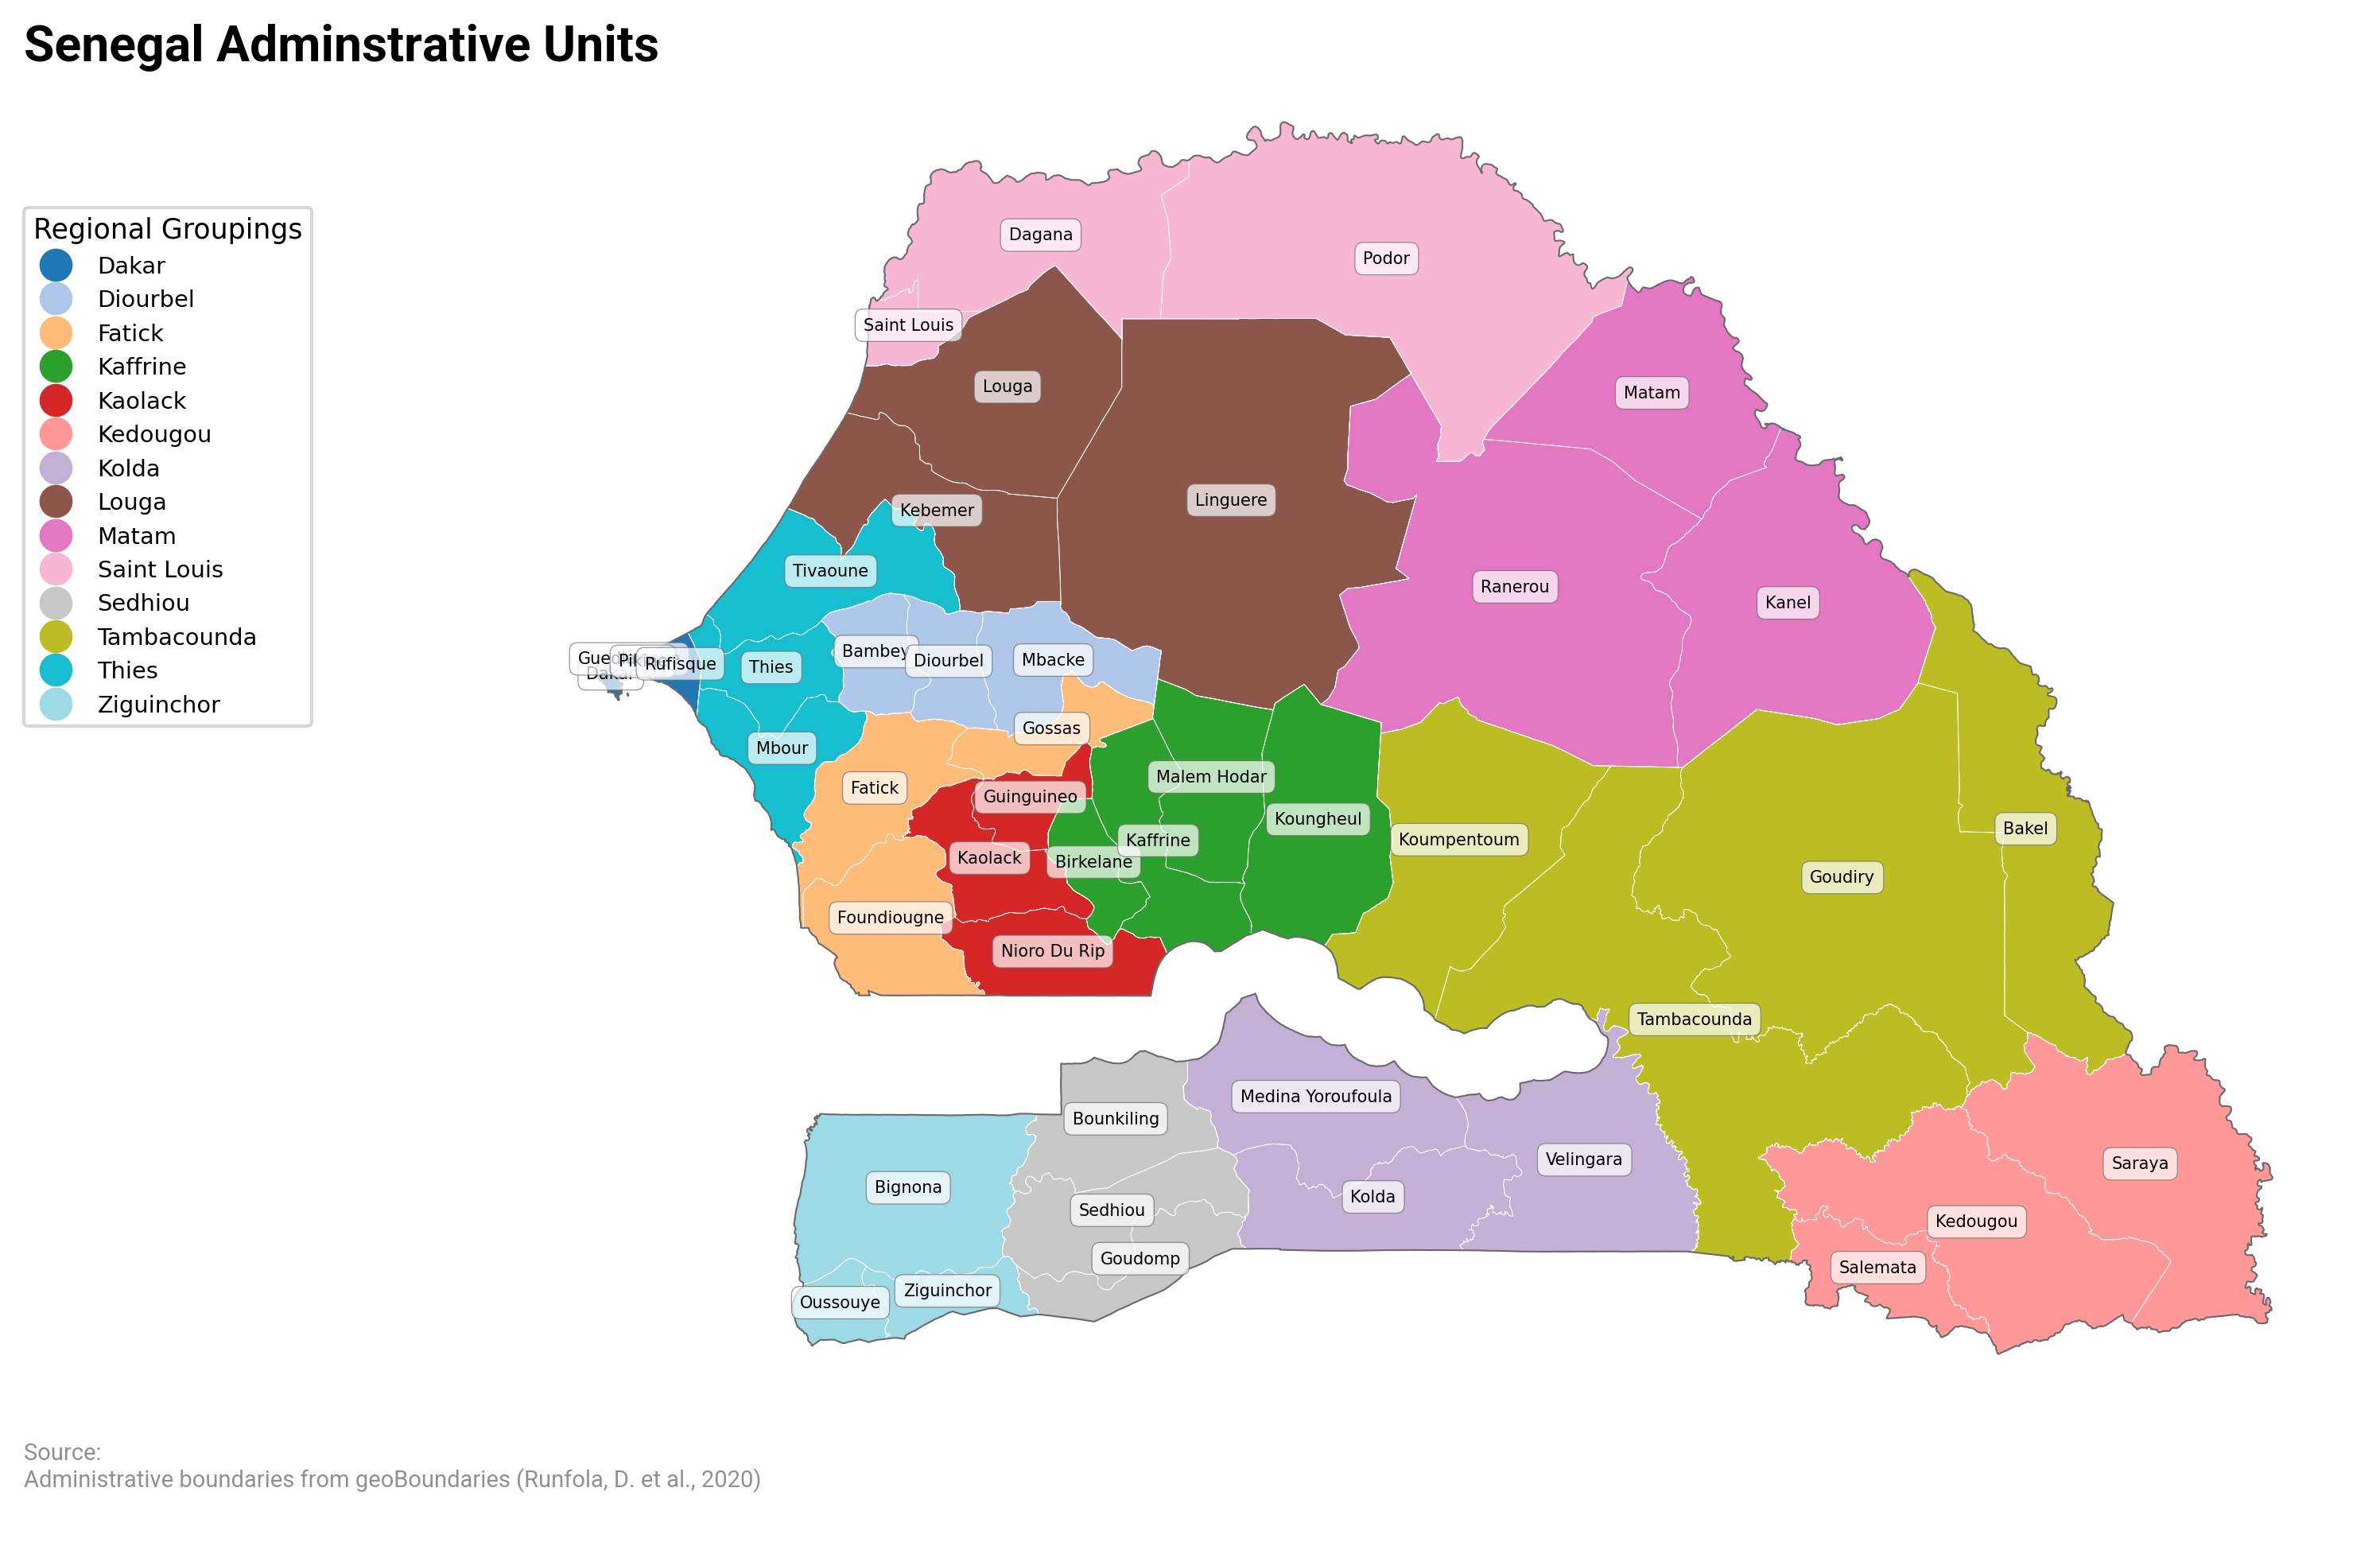

In [8]:
ax, x = geoplot.plot_geoboundaries(
    adm_level="ADM2",
    group="ADM1"
);

## Plot Population

In [ ]:
ax, x = geoplot.plot_choropleth( 
    var="idmc_idp_total",
    #kwargs={"legend_type": "colorbar"} # "legend_shrink":0.125}
)

In [ ]:
ax, x = geoplot.plot_choropleth( 
    var="idmc_conflict_idp_total",
    #kwargs={"legend_type": "colorbar"} # "legend_shrink":0.125}
)

In [ ]:
ax, x = geoplot.plot_choropleth( 
    var="bem",
    kwargs={"legend_type": "colorbar"},
    zoom_to = {"ADM1": "Western"}
)

In [ ]:
ax, x = geoplot.plot_choropleth( 
    var="worldcover_builtup",
    kwargs={"legend_type": "colorbar"}
    #kwargs={"legend_type": "colorbar", "legend_shrink":0.125}
)

In [ ]:
ax, x = geoplot.plot_choropleth( 
    var="acled_conflict_count",
    kwargs={
        "legend_type": "colorbar",
        "cmap": "Reds",
        "edgecolor": "dimgray",
    }
);

In [ ]:
ax, x = geoplot.plot_choropleth( 
    var="numPresentIdpInd",
    data=dm.dtm
)

In [ ]:
dm.data["acled_conflict_count"]

In [ ]:
ax, x = geoplot.plot_choropleth( 
    var="acled_conflict_count",
    nbins=5,
    binning="quantiles",
    zoom_to = {"ADM1": "Obock"}
);

In [ ]:
ax, x = geoplot.plot_choropleth( 
    var="acled_conflict_count",
    #nbins=3,
    #binning="quantiles",
    zoom_to = {"ADM1": "Obock"}
);
geoplot.plot_points(
    "event_type", 
    dataset="acled", 
    clustering=False,  
    kwargs={
        "alpha": 1,
        "legend_y": 0.4,
        #"legend_x": 0.275,
        "markerscale": 2,
        "cmap": "tab10"
    },
    zoom_to={"ADM1": "Obock"},
    ax=ax, xpos=x,
)

## Plot Conflict Exposure - ACLED (Population Best)

In [ ]:
source = "wbg_acled"
geoplot.plot_choropleth( 
    var=f"{source}_worldpop_exposure",
    subtitle="By township, from 2021 to 2025",
    #binning="quantiles"
    #kwargs={"legend_type": "colorbar"}
)
geoplot.plot_choropleth( 
    var=f"{source}_worldpop_exposure_relative",
    subtitle="By township, from 2021 to 2025",
    #nbins=6,
    #var_bounds=[0,100]
    kwargs={"legend_type": "colorbar"}
);

In [ ]:
source = "wbg_acled"
geoplot.plot_choropleth( 
    var=f"{source}_worldcover_builtup_exposure",
    subtitle="By township, from 2021 to 2025",
    #kwargs={"legend_type": "colorbar"}
)
geoplot.plot_choropleth( 
    var=f"{source}_worldcover_builtup_exposure_relative",
    subtitle="By township, from 2021 to 2025",
    kwargs={"legend_type": "colorbar"}
);

## Plot Conflict Exposure - ACLED (Custom Calculation)

In [ ]:
source = "wbg_acled"
geoplot.plot_choropleth( 
    var=f"{source}_worldcover_builtup_exposure",
    #binning="quantiles"
)
ax, x = geoplot.plot_choropleth( 
    var=f"{source}_bem_exposure",
    #var_bounds=[0, 100],
);

## Plot Conflict Exposure - UCDP

In [ ]:
source = "ucdp"
geoplot.plot_choropleth( 
    var=f"{source}_bem_exposure"
)
geoplot.plot_choropleth( 
    var=f"{source}_bem_exposure_relative",
    var_bounds=[0, 100]
);

## Zoom Choropleth to a specific region

In [ ]:
source = "wbg_acled"
geoplot.plot_choropleth( 
    var=f"{source}_{dm.asset}_exposure",
    zoom_to={"ADM1": "Lomami"},
    subtitle="By township, from 2021 to 2025"
)

In [ ]:
ax = geoplot.plot_choropleth( 
    var=f"{source}_{dm.asset}_exposure_relative",
    zoom_to={"ADM1": "Lakes"},
    subtitle="By township, from 2021 to 2025",
    var_bounds=[0, 100],
    kwargs={
        'legend_shrink': 0.20,
        'legend_type': 'colorbar',
    },
);

In [ ]:
ax = geoplot.plot_choropleth( 
    var=f"numPresentIdpInd",
    subtitle="By township, from 2021 to 2025",
    #var_bounds=[0, 100],
    kwargs={
        'legend_shrink': 0.20,
        'legend_type': 'colorbar',
    },
);

In [ ]:
source = "wbg_acled"
geoplot.plot_choropleth( 
    var=f"{source}_{dm.asset}_exposure",
    zoom_to={"ADM1": "Eastern Province"},
    subtitle="By township, from 2021 to 2025"
)
ax = geoplot.plot_choropleth( 
    var=f"{source}_{dm.asset}_exposure_relative",
    zoom_to={"ADM1": "Eastern Province"},
    subtitle="By township, from 2021 to 2025",
    var_bounds=[0, 100],
);

## Map Exposure to a Single Hazard

In [ ]:
hazard = "landslide_earthquake"
geoplot.plot_raster(hazard);

In [ ]:
geoplot.plot_choropleth(f"{hazard}_worldpop_exposure_relative", kwargs={"legend_type": "colorbar"});

In [ ]:
geoplot.plot_choropleth(f"{hazard}_worldcover_cropland_exposure");

In [ ]:
geoplot.plot_choropleth(f"{hazard}_worldcover_cropland_exposure_relative");

In [ ]:
geoplot.plot_choropleth(
    f"{hazard}_bem_exposure",
    #var_bounds=[0, 100],
    kwargs={"legend_type": "colorbar"},
);

In [ ]:
geoplot.plot_choropleth(
    f"{hazard}_worldpop_intensity_weighted_exposure_relative",
);

## Plot Multi-hazard Exposure Index and Multi-hazard Conflict Exposure Index

In [ ]:
geoplot.plot_choropleth( 
    var=f"mhs_all_wbg_acled_worldpop_exposure_relative",
    kwargs={
        "legend_type": "colorbar", 
        "linewidth": 0.1
    }
);

In [ ]:
geoplot.plot_choropleth( 
    var=f"mhs_all_wbg_acled_worldpop_exposure_relative",
    kwargs={
        "legend_type": "colorbar", 
        "linewidth": 0.1
    }
);

In [ ]:
ax, x = geoplot.plot_choropleth( 
    var=f"mhs_all_worldcover_cropland_exposure_relative",
    kwargs={"legend_type": "colorbar", "legend_y": 0.5,}
);
geoplot.plot_points(
    "type_of_violence", 
    dataset="acled", 
    clustering=False,  
    kwargs={
        "alpha": 0.5,
        "legend_y": 0.425,
        "markerscale": 0.5,
        "cmap": "tab10"
    },
    ax=ax, xpos=x,
);

In [ ]:
geoplot.plot_choropleth( 
    var=f"mhs_all_wbg_acled_worldpop_exposure_relative",
    subtitle="By township, from 2021 to 2025",
    kwargs={"legend_type": "colorbar"}
);

In [ ]:
geoplot.plot_choropleth( 
    var=f"mhs_all_wbg_acled_bem_exposure_relative",
    kwargs={"legend_type": "colorbar"}
);

# Bivariate Choropleth: Overlay Multi-hazard and Conflict Exposure

In [ ]:
geoplot.plot_bivariate_choropleth( 
    var1=f"wbg_acled_worldpop_exposure_relative",
    var2=f"mhs_all_worldpop_exposure_relative",
    var1_bounds=[0, 1],
    var2_bounds=[0, 1],
    binning="equal_intervals",
    kwargs={
        "legend_fontsize": 4, 
        "edgecolor": "white", 
        "linewidth": 0.2
    }
);


In [ ]:
geoplot.plot_bivariate_choropleth( 
    var2=f"idmc_disaster_idp_total",
    var1=f"mhs_all_worldpop_exposure_relative",
    #var1_bounds=[0, 1],
    #var2_bounds=[0, 1],
    binning="equal_intervals",
    kwargs={
        "legend_fontsize": 4, 
        "edgecolor": "white", 
        "linewidth": 0.2
    }
);

In [ ]:
geoplot.plot_bivariate_choropleth( 
    var1=f"wbg_acled_worldcover_builtup_exposure_relative",
    var2=f"mhs_all_worldcover_builtup_exposure_relative",
    #var1_bounds=[0, 1],
    #var2_bounds=[0, 1],
    binning="equal_intervals",
    kwargs={
        "legend_fontsize": 4, 
        "edgecolor": "white", 
        "linewidth": 0.2
    }
);

In [ ]:
geoplot.plot_bivariate_choropleth( 
    var1=f"wbg_acled_bem_exposure_relative",
    var2=f"mhs_all_bem_exposure_relative",
    #var1_bounds=[0, 1],
    #var2_bounds=[0, 1],
    binning="equal_intervals",
    kwargs={
        "legend_fontsize": 4, 
        "edgecolor": "white", 
        "linewidth": 0.2
    }
);

## Interactive Map

In [ ]:
m = geoplot.plot_folium(
    adm_level=adm_level,
    var="worldcover_builtup",
    kwargs={"zoom_start": 9}
)
m

In [ ]:
# Source: https://github.com/keplergl/kepler.gl/issues/931
#from IPython.display import Javascript
#display(Javascript('''
#  google.colab.widgets.installCustomManager('https://ssl.gstatic.com/colaboratory-static/widgets/colab-cdn-widget-manager/6a14374f468a145a/manager.min.js');
#'''))

import warnings
warnings.filterwarnings("ignore")

from keplergl import KeplerGl
map_1 = KeplerGl()
map_1.add_data(data=dm.acled, name=f"{dm.country} ACLED data")
map_1.add_data(data=dm.data, name=f"{dm.country} data")
display(map_1)

In [ ]:
 m.save("folium.html")